<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

In [2]:
np.random.normal(loc=5, scale=2, size=10)
# loc = mean, scale = standard deviation, size = number of elements to generate

array([5.47791607, 7.41975703, 1.38859497, 3.71791999, 4.85842797,
       1.17302168, 1.65795969, 7.99134935, 2.34513239, 5.54847885])

### 1.2 Visualising the random numbers

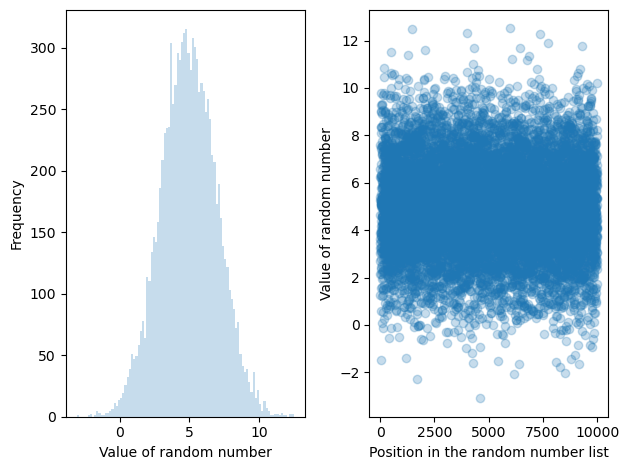

In [3]:
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.tight_layout()

### 1.3 68%?

In [4]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 67.50%


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [5]:

# Your code here


### 1.2 The simulation

In [6]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

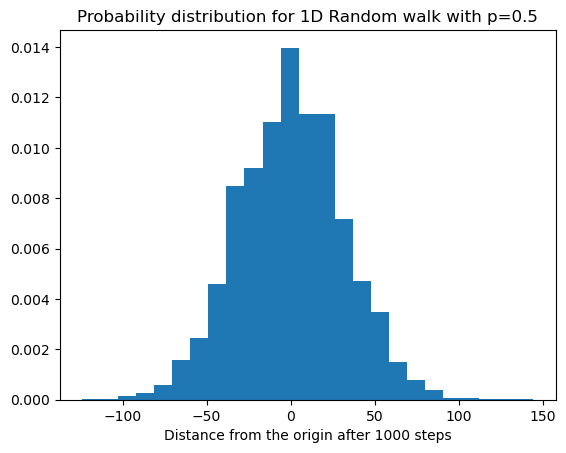

In [7]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)    # density = True will normalise the area under the curve to 1
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

In [8]:
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

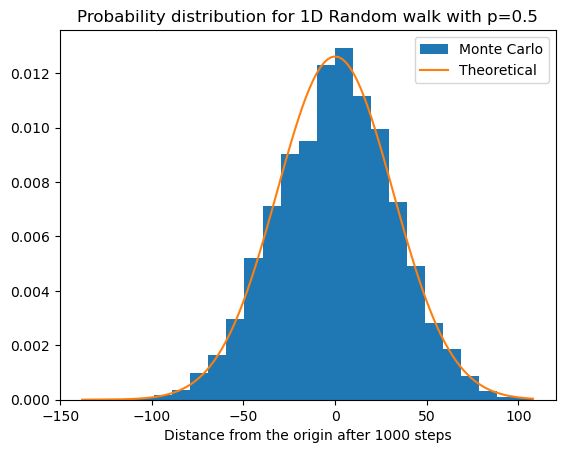

In [9]:
no_of_steps, prob_right = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=prob_right, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True,label = 'Monte Carlo')    # density = True will normalise the area under the curve to 1
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={prob_right}')



prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')
plt.legend(loc='upper right')

## 2 Estimating \(\pi\)

### 2.1 The method

In [10]:

# Your code here


### 2.2 A poor but intuitive solution

In [11]:
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin; sqrt = square root

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.1406

### 2.3 A better solution

In [12]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum(np.sqrt((x**2+y**2)) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

3.14062

### 2.4 A smarter solution

In [28]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum(np.sqrt((x**2+y**2)) <= 1)

4 * (N_green / N_total)

3.139996

## Exercise 1 :  Vital Stats of Random π

In [34]:
def estimate_pi(n):
    x=rnd.rand(n)
    y=rnd.rand(n)
    n_green=np.sum(np.sqrt((x**2+y**2)) <= 1)
    return 4 * (n_green / n)

[3.116      3.1288     3.1428     3.143548   3.1418368  3.14134816]
[0.51317054 0.1718213  0.04718135 0.01675677 0.00580132 0.00174837]


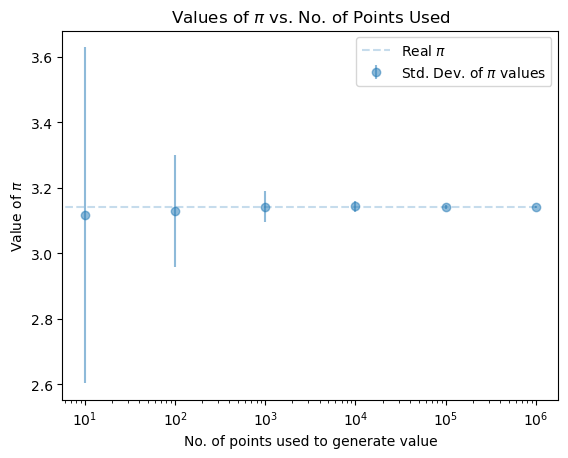

In [81]:
no_points = [10,100,1_000,10_000,100_000,1_000_000]
pi_mean = np.array([])
pi_sd = np.array([])

for i in no_points:
    e_pi = [estimate_pi(n=i) for _ in range(100)]
    pi_mean = np.append(pi_mean,np.mean(e_pi))
    pi_sd = np.append(pi_sd,np.std(e_pi))
    
print(pi_mean)
print(pi_sd)

plt.errorbar(no_points,
             pi_mean,
             yerr=pi_sd, 
             fmt='o',    # format
             alpha=.5, 
             label='Std. Dev. of $\pi$ values')
plt.hlines(np.pi,0,
           no_points[-1],
           ls='--',
           alpha=.25, 
           label='Real $\pi$')
plt.xscale('log')
plt.legend(loc='upper right')
plt.title('Values of $\pi$ vs. No. of Points Used')
plt.xlabel('No. of points used to generate value')
plt.ylabel('Value of $\pi$')
# plt.table([pi_mean,pi_sd],
#           rowLabels=['Value of $\pi$','Std. Dev. of $\pi$ values'],
#           loc='bottom', 
#           bbox=[[0, -0.5], [1, 0.3]])   # bbox([[xmin,ymin],[xmax,ymax]]) bottom left, top right
plt.show()